In [120]:
from sklearn.datasets import load_iris
from sklearn import cluster
import pandas as pd

data = load_iris()
X = pd.DataFrame(data.data, columns = list(data.feature_names))
print(X[:5])



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [121]:
model = cluster.KMeans(n_clusters=3, random_state=25)
results = model.fit(X)

X["cluster"] = results.predict(X)
X['target'] = data.target
X['c'] = 1



classification_result = X[['cluster', 'target', 'c']].groupby(['cluster', 'target']).sum()

print(classification_result)


print(X[:5])

                 c
cluster target    
0       0       50
1       1       48
        2       14
2       1        2
        2       36
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  target  c  
0        0       0  1  
1        0       0  1  
2        0       0  1  
3        0       0  1  
4        0       0  1  


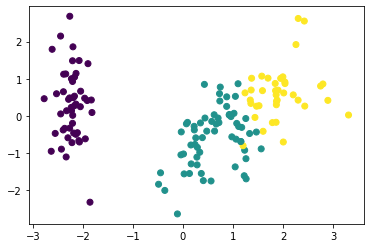

In [122]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

X1 = preprocessing.StandardScaler().fit(X.drop(['cluster', 'target'], axis=1)).transform(X.drop(['cluster', 'target'], axis=1))
model = PCA(n_components=2)
results = model.fit(X1)
Z = results.transform(X1)


num1, num2 = zip(*Z)
plt.scatter(num1, num2, c=X["cluster"])


In [123]:
q = [1,2,3,4,5]

print(len(q[0]))

TypeError: object of type 'int' has no len()